### This Program predicts if the price of a house will be above the median price or not, based on its features using Deep Learning

In [1]:
from keras.models import Sequential   # Initialize ANN
from keras.layers import Dense        # Tell us number of layers, Neurons per layer and Activation function
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

Using TensorFlow backend.


In [2]:
df = pd.read_csv('housepricedata.csv')

In [3]:
df.head()

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1


In [4]:
# Convert Data into array
dataset = df.values
dataset.shape

(1460, 11)

In [5]:
# Split Dataset into Indedpendant and Dependant
X = dataset[:,0:10] # Get all the rows of Columns 1 to 10
Y = dataset[:,10]   # Get all the rows of Column 11 i.e.AboveMedianPrice

In [6]:
print(X.shape)
print(Y.shape)

(1460, 10)
(1460,)


In [7]:
# Use MinMax Scaller to scale all features
min_max_scaler = MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
print(X_scale.shape)
X_scale

(1460, 10)


array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [8]:
# Split Data to 80-20 Train-Test Data and then further Testing data to 
# 10% Testing and 10% Validation

X_train, X_val_test, Y_train, Y_val_test = train_test_split(X_scale,Y,
                                                            test_size=0.2)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_test,Y_val_test,
                                               test_size=0.5)

In [9]:
print(X_train.shape)
print(Y_train.shape)
print(X_val.shape)
print(Y_val.shape)
print(X_test.shape)
print(Y_test.shape)

(1168, 10)
(1168,)
(146, 10)
(146,)
(146, 10)
(146,)


In [10]:
# Build Model and Architecture of Deep Neural Network

model = Sequential()  # Initialize ANN
# Add layers of Neural Network = 4 , input_dim = number oof features
# units = 32 is number of neurons
model.add(Dense(units = 32, activation='relu', input_dim=10))
model.add(Dense(units = 32, activation='relu'))
model.add(Dense(units = 32, activation='relu'))
model.add(Dense(units = 1, activation='sigmoid'))

In [11]:
# Loss Function measures how well the model did on training and then tries
# to improve on it using optimizer
model.compile(optimizer = 'sgd',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

In [12]:
# Train the model

hist = model.fit(
    X_train, Y_train,
    batch_size=32, epochs = 100,
    validation_data = (X_val, Y_val)
)

Train on 1168 samples, validate on 146 samples
Epoch 1/100
1168/1168 [==============================] - 3s 2ms/step - loss: 0.6992 - acc: 0.4752 - val_loss: 0.6955 - val_acc: 0.4110
Epoch 2/100
1168/1168 [==============================] - 0s 119us/step - loss: 0.6932 - acc: 0.4795 - val_loss: 0.6926 - val_acc: 0.4726
Epoch 3/100
1168/1168 [==============================] - 0s 148us/step - loss: 0.6893 - acc: 0.5334 - val_loss: 0.6903 - val_acc: 0.4795
Epoch 4/100
1168/1168 [==============================] - 0s 133us/step - loss: 0.6858 - acc: 0.5068 - val_loss: 0.6873 - val_acc: 0.4795
Epoch 5/100
1168/1168 [==============================] - 0s 101us/step - loss: 0.6826 - acc: 0.5077 - val_loss: 0.6843 - val_acc: 0.4795
Epoch 6/100
1168/1168 [==============================] - 0s 160us/step - loss: 0.6792 - acc: 0.5068 - val_loss: 0.6808 - val_acc: 0.4863
Epoch 7/100
1168/1168 [==============================] - 0s 123us/step - loss: 0.6756 - acc: 0.5146 - val_loss: 0.6773 - val_acc: 0.4

1168/1168 [==============================] - 0s 119us/step - loss: 0.2854 - acc: 0.8853 - val_loss: 0.2571 - val_acc: 0.9041
Epoch 61/100
1168/1168 [==============================] - 0s 177us/step - loss: 0.2841 - acc: 0.8904 - val_loss: 0.2554 - val_acc: 0.9041
Epoch 62/100
1168/1168 [==============================] - 0s 131us/step - loss: 0.2824 - acc: 0.8887 - val_loss: 0.2536 - val_acc: 0.8973
Epoch 63/100
1168/1168 [==============================] - 0s 150us/step - loss: 0.2813 - acc: 0.8844 - val_loss: 0.2567 - val_acc: 0.9041
Epoch 64/100
1168/1168 [==============================] - 0s 120us/step - loss: 0.2811 - acc: 0.8870 - val_loss: 0.2522 - val_acc: 0.8973
Epoch 65/100
1168/1168 [==============================] - 0s 155us/step - loss: 0.2800 - acc: 0.8904 - val_loss: 0.2670 - val_acc: 0.8904
Epoch 66/100
1168/1168 [==============================] - 0s 183us/step - loss: 0.2782 - acc: 0.8853 - val_loss: 0.2518 - val_acc: 0.9041
Epoch 67/100
1168/1168 [=======================

In [13]:
# Evaluate the model

model.evaluate(X_test, Y_test)[1]  # Position 1  will will return accuracy

146/146 [==============================] - 0s 112us/step


0.8972602707065948

In [14]:
# Make a Prediction
# All these predictions are pencentages
# Since our objective is to predict the price is above or below Median Price
# So we will seturp a Thresold to form our output lable

prediction = model.predict(X_test)
prediction[0]

array([0.96608436], dtype=float32)

In [15]:
prediction2 = np.where(prediction>= 0.87, 1,0 )

In [16]:
prediction1 = [1 if y>=0.87 else 0 for y in prediction]

In [17]:
len(prediction2[prediction2 ==0])

94

In [18]:
hist.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

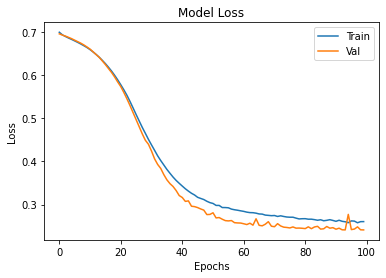

In [19]:
# Visuialize the Training and Valudation Loss to see if Model is overfitting
plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Val'])

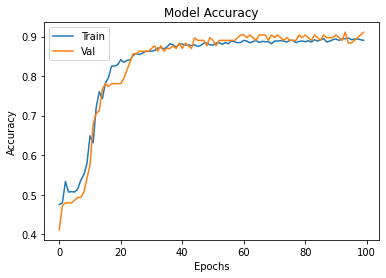

In [21]:
# Visuialize the Training and Valudation Loss to see if Model is overfitting
plt.plot(hist.history["acc"])
plt.plot(hist.history["val_acc"])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Val'])

# From both charts its is clear that model is following trend with accuracy > 80% and is not overfitting